# Cluster LVs
This notebook will analyze the latent variables learned by MousiPLIER to see if any studies in the training data have strong clusters in LV space 

In [1]:
import math

import pandas as pd
import pyreadr
from sklearn import cluster, metrics
from tqdm import tqdm
from plotnine import *


from src.transform import PlierTransform

In [2]:
# Load LVs
transformer = PlierTransform('output/filtered_Z.tsv', 'output/filtered_lambda.txt', debug=True)

Loading values:
[[0.4184244  0.         0.         ... 0.         0.10552244 0.01813374]
 [0.06675506 0.         0.         ... 0.         0.55492576 0.06369385]
 [0.         0.16142151 0.         ... 0.         0.39009983 0.31851312]
 ...
 [0.         0.01369071 0.         ... 0.01613456 0.         0.08217319]
 [0.         0.         0.00938409 ... 0.         0.         0.        ]
 [0.         0.60288011 0.         ... 0.         0.19689213 0.        ]]
Loadings shape: (11109, 196)
Loadings sparsity = 0.6848919151781696


In [3]:
# Load metadata
metadata_df = pyreadr.read_r('data/metadata_df.rda')['metadata_df']
metadata_df

,rail_id,external_id,study,sra.sample_acc.x,sra.experiment_acc,sra.submission_acc,sra.submission_center,sra.submission_lab,sra.study_title,sra.study_abstract,...,recount_seq_qc.%n,recount_seq_qc.avgq,recount_seq_qc.errq,recount_pred.sample_acc.y,recount_pred.curated.type,recount_pred.curated.tissue,recount_pred.pattern.predict.type,recount_pred.pred.type,recount_pred.curated.cell_type,recount_pred.curated.cell_line
0,12124608,SRR8249203,SRP170963,SRS4082403,SRX5067019,SRA815346,GEO,NaN,Deep single-cell RNAseq of postnatal day 7 mic...,We generated single-cell RNAseq profiles of 36...,...,0.0,34.5,27.2,SRS4082403,NaN,NaN,scrna-seq,scrna-seq,NaN,NaN
1,12124736,SRR8249204,SRP170963,SRS4082404,SRX5067020,SRA815346,GEO,NaN,Deep single-cell RNAseq of postnatal day 7 mic...,We generated single-cell RNAseq profiles of 36...,...,0.0,34.5,27.2,SRS4082404,NaN,NaN,scrna-seq,scrna-seq,NaN,NaN
2,12124992,SRR8249206,SRP170963,SRS4082407,SRX5067022,SRA815346,GEO,NaN,Deep single-cell RNAseq of postnatal day 7 mic...,We generated single-cell RNAseq profiles of 36...,...,0.0,34.5,27.2,SRS4082407,NaN,NaN,scrna-seq,scrna-seq,NaN,NaN
3,12126273,SRR8249210,SRP170963,SRS4082410,SRX5067026,SRA815346,GEO,NaN,Deep single-cell RNAseq of postnatal day 7 mic...,We generated single-cell RNAseq profiles of 36...,...,0.0,34.5,27.3,SRS4082410,NaN,NaN,scrna-seq,scrna-seq,NaN,NaN
4,12126401,SRR8249211,SRP170963,SRS4082411,SRX5067027,SRA815346,GEO,NaN,Deep single-cell RNAseq of postnatal day 7 mic...,We generated single-cell RNAseq profiles of 36...,...,0.0,34.4,27.1,SRS4082411,NaN,NaN,scrna-seq,scrna-seq,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416837,3842673,SRR5445513,SRP103859,SRS2122385,SRX2734511,SRA554033,GEO,NaN,Next Generation Sequencing of p53 KO and Utx/p...,Hematopoitic stem cells from Utx/p53 DKO mice ...,...,0.0,36.8,24.4,SRS2122385,NaN,NaN,rna-seq,rna-seq,NaN,NaN
416838,3842705,SRR5445514,SRP103859,SRS2122385,SRX2734511,SRA554033,GEO,NaN,Next Generation Sequencing of p53 KO and Utx/p...,Hematopoitic stem cells from Utx/p53 DKO mice ...,...,0.0,34.9,23.1,SRS2122385,NaN,NaN,rna-seq,rna-seq,NaN,NaN
416839,3842736,SRR5445515,SRP103859,SRS2122377,SRX2734512,SRA554033,GEO,NaN,Next Generation Sequencing of p53 KO and Utx/p...,Hematopoitic stem cells from Utx/p53 DKO mice ...,...,0.0,36.5,23.2,SRS2122377,NaN,NaN,rna-seq,rna-seq,NaN,NaN
416840,3842768,SRR5445516,SRP103859,SRS2122377,SRX2734512,SRA554033,GEO,NaN,Next Generation Sequencing of p53 KO and Utx/p...,Hematopoitic stem cells from Utx/p53 DKO mice ...,...,0.0,36.6,24.3,SRS2122377,NaN,NaN,rna-seq,rna-seq,NaN,NaN


In [54]:
tmp_df = metadata_df.loc[:, ['study', 'sra.study_title']]
tmp_df = tmp_df.drop_duplicates()
study_to_title = dict(zip(tmp_df['study'],tmp_df['sra.study_title']))
tmp_df

,study,sra.study_title
0,SRP170963,Deep single-cell RNAseq of postnatal day 7 mic...
369,SRP045763,Dynamics of gene silencing during X inactivati...
391,DRP005463,Transcriptome of Mpst KO mouse
403,SRP172863,Bach2 is a critical negative regulator of Tfh ...
411,SRP186363,Trained immunity-promoting nanobiologics suppr...
...,...,...
416762,SRP194159,Effector TH17 cells give rise to long-lived TR...
416772,SRP083959,RNA profiling to describe the transcriptional ...
416788,SRP098559,ATR Mutations Promote the Growth of Melenama T...
416812,ERP010759,Transcriptome_of_the_vomeronasal_organ_in_Vmn2...


In [4]:
metadata_df['study'].value_counts()

SRP150473    28650
SRP187821    12284
SRP144582     8124
ERP112843     6614
SRP139086     4776
             ...  
SRP035427        1
SRP121168        1
SRP220664        1
SRP121135        1
SRP121127        1
Name: study, Length: 10088, dtype: int64

In [5]:
expression_file = 'data/no_scrna_rpkm.tsv'
line_count = 0
with open(expression_file, 'r') as in_file:
    for line in in_file:
        line_count += 1
print(line_count)

190112


In [6]:
# Input data is too large to store in memory in expression space, but it will fit in LV space
lv_dfs = []

NUM_SLICES = 10

for i in tqdm(range(NUM_SLICES)):
    nrows = math.ceil(line_count / NUM_SLICES)
    # Always read the header row by starting skip at row 1
    skiprows = range(1, i * nrows)
    data_df = pd.read_csv('data/no_scrna_rpkm.tsv', sep='\t', header=0, skiprows=skiprows, nrows=nrows)
    sample_ids = data_df['sample']
    transformed_df = transformer.transform(data_df)
    transformed_df['sample'] = sample_ids
    lv_dfs.append(transformed_df)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:35<00:00, 87.58s/it]


In [7]:
lv_df = pd.concat(lv_dfs)
print(lv_df.shape)
lv_df

(190112, 197)


,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV188,LV189,LV190,LV191,LV192,LV193,LV194,LV195,LV196,sample
0,-0.016630,-0.026942,-0.015635,0.033415,0.007214,-0.002052,-0.008481,-0.013915,-0.098229,-0.013462,...,-0.010631,0.010824,-0.018213,0.009058,-0.011831,0.050830,0.002404,-0.037124,0.021725,SRR1557112
1,-0.019498,-0.016332,-0.024485,0.006340,-0.006971,-0.011673,-0.010778,-0.023543,-0.105526,-0.017519,...,-0.005466,-0.003106,-0.015373,0.001975,-0.018783,0.083679,-0.003550,0.091549,-0.005003,SRR1557113
2,-0.007805,-0.015924,-0.017381,0.013943,-0.007270,0.000067,0.015086,-0.023686,-0.108203,-0.023622,...,0.000755,0.017406,-0.018852,-0.008103,-0.032033,-0.013693,-0.009100,0.105960,-0.025597,SRR1557114
3,-0.012973,-0.019249,-0.020952,-0.011626,-0.008815,0.002477,-0.024644,-0.016858,-0.105234,-0.016088,...,-0.006642,-0.006226,-0.006120,-0.013609,-0.021917,0.058357,-0.008944,0.097394,-0.006806,SRR1557115
4,-0.008012,-0.018679,-0.019879,-0.016724,-0.014097,-0.004841,-0.024782,-0.005431,-0.102108,-0.010897,...,-0.011763,-0.003315,-0.009140,-0.015164,-0.001997,0.095090,-0.013426,0.065233,0.008561,SRR1557116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,-0.020930,-0.033730,-0.009624,-0.005603,-0.023101,-0.009814,-0.062296,-0.014324,-0.089560,-0.005474,...,-0.003477,-0.014207,-0.006050,-0.018633,-0.004109,0.054167,-0.003924,-0.070536,0.001066,SRR5445513
19000,-0.020529,-0.032853,-0.010576,-0.006039,-0.024286,-0.009745,-0.066634,-0.014007,-0.098707,-0.006140,...,-0.002646,-0.015283,-0.004999,-0.019502,-0.007459,0.062781,-0.004135,-0.073554,0.001312,SRR5445514
19001,-0.021876,-0.036690,-0.016568,-0.001905,-0.016355,-0.005478,-0.023354,-0.013587,-0.103818,-0.005980,...,-0.001611,-0.009249,0.000321,-0.012844,-0.016115,-0.026269,-0.003601,-0.044239,-0.005004,SRR5445515
19002,-0.020415,-0.036915,-0.015352,-0.001895,-0.016718,-0.005868,-0.022357,-0.014159,-0.104752,-0.005584,...,-0.001305,-0.009889,-0.000467,-0.012161,-0.016724,-0.027038,-0.004082,-0.044152,-0.005243,SRR5445516


In [8]:
lv_df_with_metadata = lv_df.merge(metadata_df, left_on='sample', right_on='external_id')

In [9]:
lv_df_with_metadata

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,recount_seq_qc.%n,recount_seq_qc.avgq,recount_seq_qc.errq,recount_pred.sample_acc.y,recount_pred.curated.type,recount_pred.curated.tissue,recount_pred.pattern.predict.type,recount_pred.pred.type,recount_pred.curated.cell_type,recount_pred.curated.cell_line
0,-0.016630,-0.026942,-0.015635,0.033415,0.007214,-0.002052,-0.008481,-0.013915,-0.098229,-0.013462,...,2.6,25.1,8.9,SRS688769,NaN,NaN,rna-seq,rna-seq,NaN,NaN
1,-0.019498,-0.016332,-0.024485,0.006340,-0.006971,-0.011673,-0.010778,-0.023543,-0.105526,-0.017519,...,2.8,24.9,8.9,SRS688770,NaN,NaN,rna-seq,rna-seq,NaN,NaN
2,-0.007805,-0.015924,-0.017381,0.013943,-0.007270,0.000067,0.015086,-0.023686,-0.108203,-0.023622,...,2.7,24.3,8.7,SRS688771,NaN,NaN,rna-seq,rna-seq,NaN,NaN
3,-0.012973,-0.019249,-0.020952,-0.011626,-0.008815,0.002477,-0.024644,-0.016858,-0.105234,-0.016088,...,2.5,24.9,8.9,SRS688772,NaN,NaN,rna-seq,rna-seq,NaN,NaN
4,-0.008012,-0.018679,-0.019879,-0.016724,-0.014097,-0.004841,-0.024782,-0.005431,-0.102108,-0.010897,...,2.5,25.4,9.1,SRS688773,NaN,NaN,rna-seq,rna-seq,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190107,-0.020930,-0.033730,-0.009624,-0.005603,-0.023101,-0.009814,-0.062296,-0.014324,-0.089560,-0.005474,...,0.0,36.8,24.4,SRS2122385,NaN,NaN,rna-seq,rna-seq,NaN,NaN
190108,-0.020529,-0.032853,-0.010576,-0.006039,-0.024286,-0.009745,-0.066634,-0.014007,-0.098707,-0.006140,...,0.0,34.9,23.1,SRS2122385,NaN,NaN,rna-seq,rna-seq,NaN,NaN
190109,-0.021876,-0.036690,-0.016568,-0.001905,-0.016355,-0.005478,-0.023354,-0.013587,-0.103818,-0.005980,...,0.0,36.5,23.2,SRS2122377,NaN,NaN,rna-seq,rna-seq,NaN,NaN
190110,-0.020415,-0.036915,-0.015352,-0.001895,-0.016718,-0.005868,-0.022357,-0.014159,-0.104752,-0.005584,...,0.0,36.6,24.3,SRS2122377,NaN,NaN,rna-seq,rna-seq,NaN,NaN


In [10]:
lv_df_with_metadata['study'].value_counts() > 10

ERP008773     True
ERP110541     True
SRP132477     True
SRP092108     True
ERP004375     True
             ...  
SRP121143    False
SRP095667    False
SRP167843    False
SRP121167    False
SRP068858    False
Name: study, Length: 9270, dtype: bool

In [11]:
frequent_studies = set(lv_df_with_metadata['study'].value_counts()[(lv_df_with_metadata['study'].value_counts() > 30)].index)
filtered_study_df = lv_df_with_metadata[lv_df_with_metadata['study'].isin(frequent_studies)]
filtered_study_df['study'].value_counts()

ERP008773    2861
ERP110541    2112
SRP132477    1767
SRP092108    1419
ERP004375    1271
             ... 
SRP111723      31
SRP045805      31
SRP123623      31
SRP066809      31
SRP045874      31
Name: study, Length: 1205, dtype: int64

## Cluster WT microglia LVs

In [74]:
studies = set(filtered_study_df['study'])
lv = 'LV3'

results = {'scores': [], 'studies': []}

for study in studies:
    kmeans = cluster.KMeans(n_clusters=4, random_state=42)
    study_df = lv_df_with_metadata[lv_df_with_metadata['study'] == study]
    
    lv_data = study_df[lv].values.reshape(-1, 1)
    clusters = kmeans.fit_predict(lv_data)
    
    score = metrics.silhouette_score(lv_data, clusters, random_state=42)
    results['scores'].append(score)
    results['studies'].append(study)
    

<AxesSubplot:>

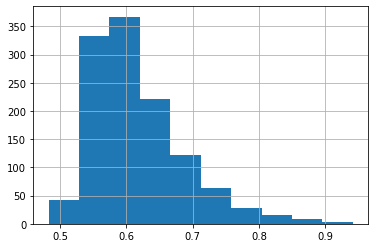

In [75]:
result_df = pd.DataFrame(results)
result_df['scores'].hist()

In [76]:
result_df.sort_values(by='scores', ascending=False)

,scores,studies
436,0.941748,SRP095396
290,0.907418,SRP059331
1173,0.896849,SRP039402
1067,0.889150,SRP149804
752,0.880920,SRP150057
...,...,...
48,0.495067,SRP079915
1070,0.494668,SRP104179
666,0.493368,SRP090328
186,0.490145,SRP126573


/home/heil/anaconda3/envs/mousiplier/lib/python3.7/site-packages/plotnine/facets/facet.py:399: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


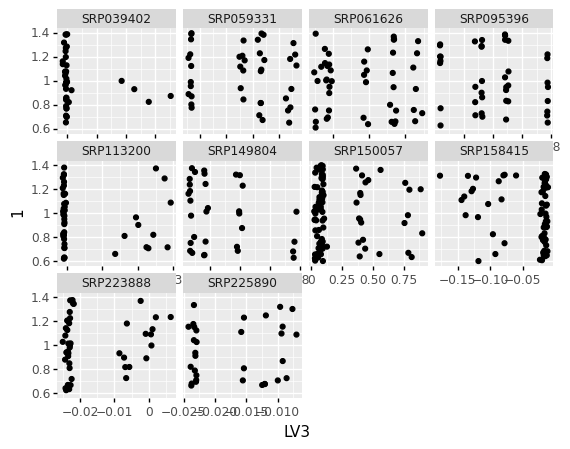

<ggplot: (8735242656637)>

In [77]:
top_studies = result_df.sort_values(by='scores', ascending=False)['studies'][:10]

plot_df = lv_df_with_metadata[lv_df_with_metadata['study'].isin(top_studies)]
plot = ggplot(plot_df, aes(x='LV3', y=1))
plot += facet_wrap('~ study', scales='free_x')
plot += geom_jitter()
plot

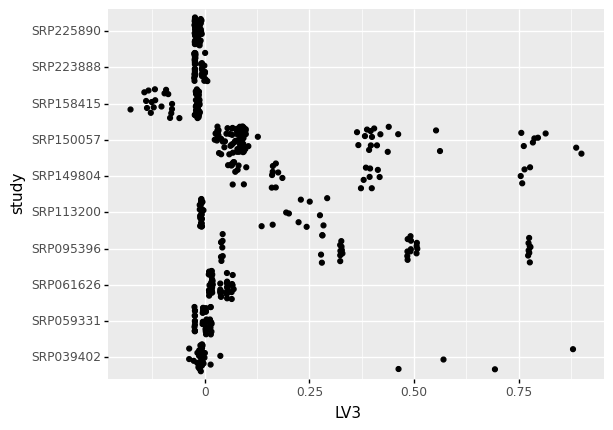

<ggplot: (8735242190657)>

In [78]:
top_studies = result_df.sort_values(by='scores', ascending=False)['studies'][:10]

plot_df = lv_df_with_metadata[lv_df_with_metadata['study'].isin(top_studies)]
plot = ggplot(plot_df, aes(x='LV3', y='study'))
plot += geom_jitter()
plot

## Plot all Microglia LVs

In [79]:
studies = set(filtered_study_df['study'])

# Overlaps: LV46 (wt_astrocytes), LV99 (AD_astrocytes)
microglia_lvs = ['LV3', 'LV46', 'LV48', 'LV51', 'LV86', 'LV99', 'LV115', 'LV159']

results = {'scores': [], 'studies': [], 'lv': []}
# TODO study selection is wrong
for lv in microglia_lvs:
    for study in studies:
        kmeans = cluster.KMeans(n_clusters=4, random_state=42)
        study_df = lv_df_with_metadata[lv_df_with_metadata['study'] == study]

        lv_data = study_df[lv].values.reshape(-1, 1)
        clusters = kmeans.fit_predict(lv_data)

        score = metrics.silhouette_score(lv_data, clusters, random_state=42)
        results['scores'].append(score)
        results['studies'].append(study)
        results['lv'].append(lv)
    

In [80]:
result_df = pd.DataFrame(results)
result_df = result_df.sort_values(by='scores', ascending=False)
top_ten_studies = result_df.groupby('lv').head(10)
top_ten_studies

,scores,studies,lv
7071,0.991403,SRP194587,LV99
4289,0.963259,SRP222529,LV51
9109,0.941804,SRP222529,LV159
436,0.941748,SRP095396,LV3
8456,0.940439,SRP096631,LV159
...,...,...,...
1599,0.786119,ERP105638,LV46
2352,0.783910,SRP183089,LV46
1875,0.782332,ERP001606,LV46
1469,0.776003,SRP145494,LV46


In [91]:
for lv in microglia_lvs:
    score_df = top_ten_studies[top_ten_studies['lv'] == lv]
    top_studies = set(score_df['studies'])
        
    study_lvs = lv_df_with_metadata[lv_df_with_metadata['study'].isin(top_studies)]
    study_values = study_lvs.loc[:, ['study', lv]]
    
    plot = ggplot(study_values, aes(x=lv, y='study'))
    plot += geom_jitter()
    plot.save(f'output/{lv}-clusters.svg')
    
    plot = ggplot(study_values, aes(x=lv, y=1))
    plot += geom_jitter()
    plot += facet_wrap('~ study', scales='free_x')
    plot.save(f'output/{lv}-facets.svg')

/home/heil/anaconda3/envs/mousiplier/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/mousiplier/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: output/LV3-clusters.svg
/home/heil/anaconda3/envs/mousiplier/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/mousiplier/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: output/LV3-facets.svg
/home/heil/anaconda3/envs/mousiplier/lib/python3.7/site-packages/plotnine/facets/facet.py:399: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/heil/anaconda3/envs/mousiplier/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/mousiplier/lib/python3.7/site-packages/plotni

In [96]:
pd.options.display.max_colwidth = 120
pd.options.display.max_rows = 80
df_list = []
for lv in microglia_lvs:
    study_df = top_ten_studies[top_ten_studies['lv'] == lv]
    study_df['title'] = study_df['studies'].map(study_to_title)
    df_list.append(study_df)
pd.concat(df_list)

/home/heil/anaconda3/envs/mousiplier/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,scores,studies,lv,title
436,0.941748,SRP095396,LV3,Comparative genomic analysis of basal and LPS-induced expression patterns of bone marrow derived macrophages and bon...
290,0.907418,SRP059331,LV3,Gene expression analysis of mice liver tumors isolated from ß2SP+/-; SMAD3+/- mice
1173,0.896849,SRP039402,LV3,"High-resolution mapping reveals a conserved, widespread, dynamic meiotically regulated mRNA methylation program [Mm]"
1067,0.889150,SRP149804,LV3,Metabolic regulation of gene expression by histone lactylation
752,0.880920,SRP150057,LV3,Interferon Regulatory Factor 8 (IRF8) Deficiency Promotes Osteoclast Transcriptional Program
678,0.871368,SRP061626,LV3,RNA-seq analysis of microglia and infiltrating macrophages in the injured retina
1184,0.870146,SRP223888,LV3,ICE_Epigenomics
342,0.867128,SRP158415,LV3,BCL6 de-repression induces the fasting transcriptome and protects from steatosis (RNA-Seq)
1116,0.863053,SRP113200,LV3,RNA-seq data of intestinal epithelial cells and lamina propria dendritic cells
1181,0.860148,SRP225890,LV3,Muscle specific MyD88-/- confers a sexual dimorphism protecting female mice from inactivity-induced fat accumulation
